Summary and visualization default NEMO-forcing file package <a href='http://www.nemo-ocean.eu/Using-NEMO/Configurations/ORCA2_LIM-and-AGRIF-demonstrator'>ORCA2_LIM_nemo_v3.4</a>.

#Content
1. [**Import modules & tools**](#Import-modules-&-tools)
1. [**Define plot functions**](#Define-plot-functions)
1. [**Forcing: coordinates.nc**](#Forcing:-coordinates.nc)
1. [**Forcing: sst_data.nc**](#Forcing:-sst_data.nc)
1. [**Forcing: sss_data.nc**](#Forcing:-sss_data.nc)
1. [**Forcing: runoff_core_monthly.nc**](#Forcing:-runoff_core_monthly.nc)

In [1]:
import sys
sys.path.insert(0, '_libs/')

In [2]:
import glob
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from __future__ import division
from __future__ import print_function
from mpl_toolkits.basemap import cm
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [3]:
reload(Nts)

<module 'NEMO_tools' from '_libs/NEMO_tools.pyc'>

# Define plot functions

In [4]:
def draw_ORCA2_global(lon, lat, var, clev, var_name, CMap):
    '''
        Draw NEMO forcing data on a global scale
    '''
    #fig
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    #left
    proj=Basemap(projection='npstere', resolution='c', \
                    boundinglat=0, lon_0=90, round=True, ax=axes[0])
    proj.drawcoastlines(linewidth=1.5, linestyle='-', color='k', zorder=3)
    proj.drawlsmask(land_color=[0.5, 0.5, 0.5], ocean_color='None', lsmask=None, zorder=2, resolution='c')
    x, y=proj(lon, lat)
    CS=proj.contourf(x, y, var, clev, cmap=CMap, extend='both')
    proj.contour(x, y, var, clev, colors='k', linewidths=2.0)
    # colorbar
    CBar=proj.colorbar(CS, location='bottom', size='5%', pad='10%')
    CBar.set_label(var_name, fontsize=14, fontweight='bold')
    CBar.ax.tick_params(axis='x', length=22.5)
    #right
    proj=Basemap(projection='spstere', resolution='c', \
                    boundinglat=0, lon_0=90, round=True, ax=axes[1])
    ax=plt.gca()
    proj.drawcoastlines(linewidth=1.5, linestyle='-', color='k', zorder=3)
    proj.drawlsmask(land_color=[0.5, 0.5, 0.5], ocean_color='None', lsmask=None, zorder=2, resolution='c')
    x, y=proj(lon, lat)
    CS=proj.contourf(x, y, var, clev, cmap=CMap, extend='both')
    proj.contour(x, y, var, clev, colors='k', linewidths=2.0)
    # colorbar
    CBar=proj.colorbar(CS, location='bottom', size='5%', pad='10%')
    CBar.set_label(var_name, fontsize=14, fontweight='bold')
    CBar.ax.tick_params(axis='x', length=22.5)
    return fig, axes

In [5]:
def draw_temporal_variation(time, data, var_name, color):
    '''
        Draw the temporal variation of NEMO forcings
    '''
    fig=plt.figure(figsize=(7, 7))
    ax=plt.gca()
    ax.plot(time, data, linewidth=3.5, color=color)
    plt.grid()
    ax.set_xlabel('Time')
    ax.set_ylabel(var_name)
    return fig, ax

# Forcing: coordinates.nc

In [6]:
coordinate_name=glob.glob('_data/NEMO/ORCA2_INPUT/coordinates*.nc')
print("found file: \n{}".format(coordinate_name))

found file: 
['_data/NEMO/ORCA2_INPUT\\coordinates.nc']


In [7]:
coordinate_obj=nc.Dataset(coordinate_name[0])
print('Variables in {}:\n==========\n{}'.format(coordinate_name[0], coordinate_obj.variables.keys()))

Variables in _data/NEMO/ORCA2_INPUT\coordinates.nc:
[u'nav_lon', u'nav_lat', u'nav_lev', u'time', u'time_steps', u'glamt', u'glamu', u'glamv', u'glamf', u'gphit', u'gphiu', u'gphiv', u'gphif', u'e1t', u'e1u', u'e1v', u'e1f', u'e2t', u'e2u', u'e2v', u'e2f']


In [8]:
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]
#time_steps=coordinate_obj.variables['time_steps'][:]
#glamt=coordinate_obj.variables['glamt'][:]
#glamu=coordinate_obj.variables['glamu'][:]
#glamv=coordinate_obj.variables['glamv'][:]
#glamf=coordinate_obj.variables['glamf'][:]
#gphit=coordinate_obj.variables['gphit'][:]
#gphiu=coordinate_obj.variables['gphiu'][:]
#gphiv=coordinate_obj.variables['gphiv'][:]
#gphif=coordinate_obj.variables['gphif'][:]
#e1v=coordinate_obj.variables['e1v'][:]
#e1f=coordinate_obj.variables['e1f'][:]
#e2v=coordinate_obj.variables['e2v'][:]
#e2f=coordinate_obj.variables['e2f'][:]

In [9]:
help(Nts.plot_NEMO_grid)

Help on function plot_NEMO_grid in module NEMO_tools:

plot_NEMO_grid(lon, lat, bound_lat=0, color='k', linewidth=0.5, relax=1, location='north')
        Plot NEMO grid, works for: 
                                ORCA2 tripolar grid
                                Xianming's grid
                                
                            ----- created on 2014/12/11, Yingkai (Kyle) Sha        
    -----------------------------------------------------------------------
        fig, axes=draw_ORCA2_grid(...)
    -----------------------------------------------------------------------
        Input:
                lon, lat : longitude and latitude records, usually nav_lon, nav_lat
                bound_lat: Latitude boundary, e.g. =45 means starts from 45N/S for North/South
                color    : color of line object
                linewidth: width of line object
                relax    : draw every 2 grid line (when =2)
                location : for north hemisphere (= north)
  

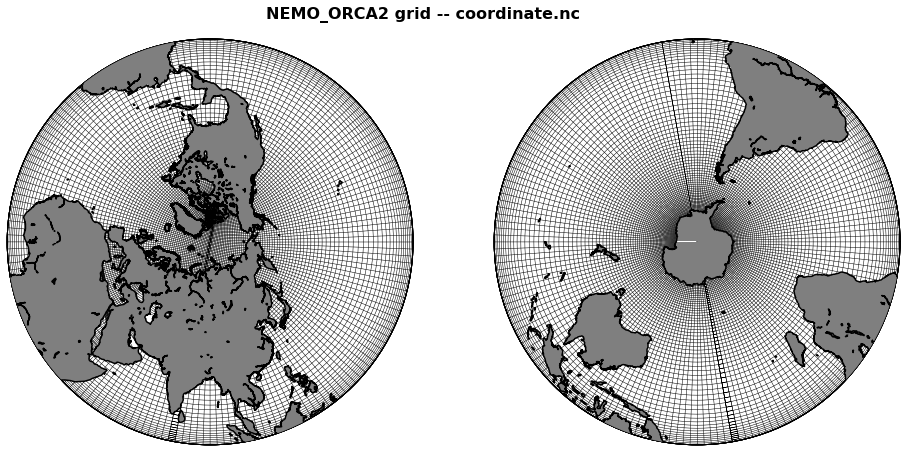

In [10]:
fig, ax = Nts.plot_NEMO_grid(nav_lon, nav_lat, 0, 'k', linewidth=0.5, relax=1, location='both')
#
fig.set_size_inches(16, 8)
plt.figtext(0.35, 0.9, 'NEMO_ORCA2 grid -- coordinate.nc', fontsize=16, fontweight='bold')
fig.canvas.draw()

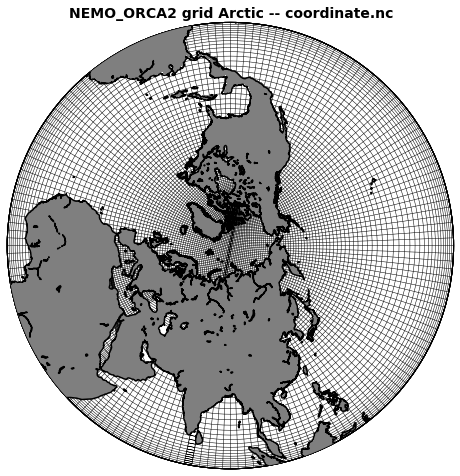

In [11]:
fig, ax = Nts.plot_NEMO_grid(nav_lon, nav_lat, 0, 'k', linewidth=0.5, location='north')
#
title='NEMO_ORCA2 grid Arctic -- coordinate.nc'
ax.set_title(title, fontsize=14, fontweight='bold')
fig.set_size_inches(8, 8)
fig.canvas.draw()

In [15]:
coordinate_name=glob.glob('_data/EXP01*.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]

In [ ]:
nav_lon.sh

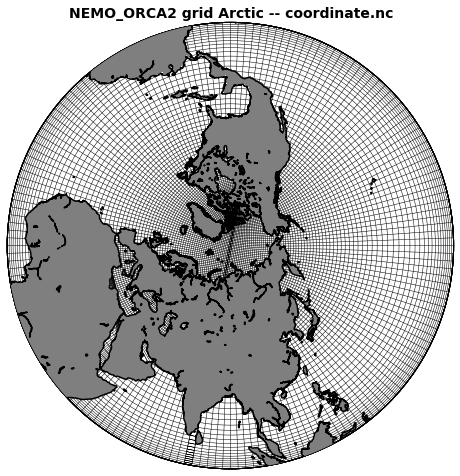

In [14]:
fig, ax = Nts.plot_NEMO_grid(nav_lon, nav_lat, 0, 'k', linewidth=0.5, location='north')
#
title='NEMO_ORCA2 grid Arctic -- coordinate.nc'
ax.set_title(title, fontsize=14, fontweight='bold')
fig.set_size_inches(8, 8)
fig.canvas.draw()

# Forcing: sst_data.nc

In [12]:
sst_name=glob.glob('_data/NEMO/ORCA2_INPUT/sst*.nc')
print("found file: \n{}".format(sst_name))

found file: 
['_data/NEMO/ORCA2_INPUT\\sst_data.nc']


In [13]:
sst_obj=nc.Dataset(sst_name[0])
print('Variables in {}:\n==========\n{}'.format(sst_name[0], sst_obj.variables.keys()))

Variables in _data/NEMO/ORCA2_INPUT\sst_data.nc:
[u'nav_lat', u'nav_lon', u'time_counter', u'sst']


In [14]:
time_counter=sst_obj.variables['time_counter'][:]
nav_lon=sst_obj.variables['nav_lon'][:]
nav_lat=sst_obj.variables['nav_lat'][:]
sst=sst_obj.variables['sst'][:]

(array([ 114217.,   27522.,   18858.,   15459.,   15218.,   16321.,
          18639.,   27930.,   64551.,    6701.]),
 array([ -2.10009384,   1.39139824,   4.88289032,   8.3743824 ,
         11.86587448,  15.35736656,  18.84885864,  22.34035072,
         25.8318428 ,  29.32333488,  32.81482697]),
 <a list of 10 Patch objects>)

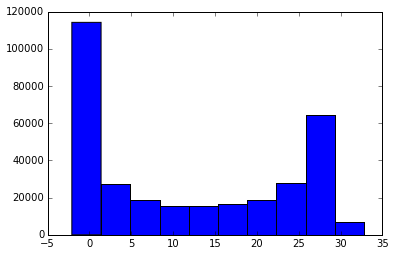

In [15]:
plt.hist(sst.flat)

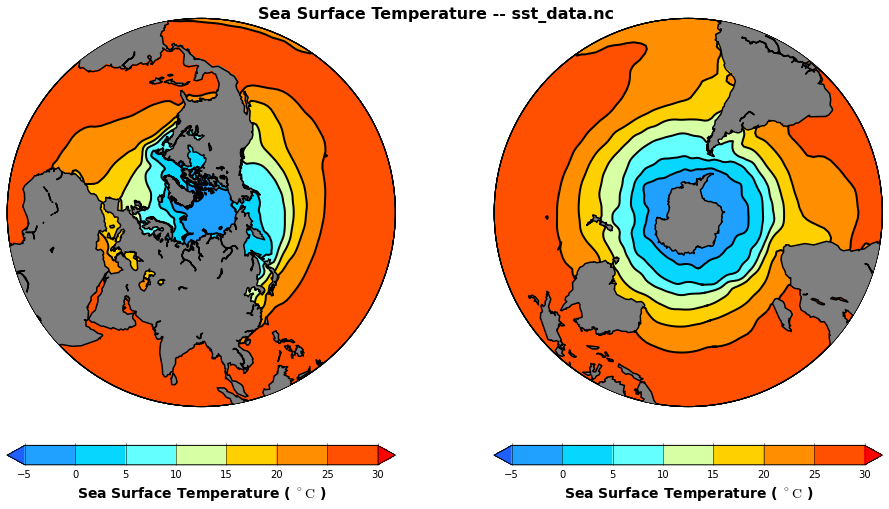

In [16]:
clev=np.arange(-5, 35, 5)
var_name='Sea Surface Temperature ( $\mathrm{^\circ C}$ )'
CMap=cm.GMT_no_green
fig, ax = draw_ORCA2_global(nav_lon, nav_lat, np.mean(sst, 0), clev, var_name, CMap)
fig.set_size_inches(16, 8)
plt.figtext(0.35, 0.9, 'Sea Surface Temperature -- sst_data.nc', fontsize=16, fontweight='bold')
fig.canvas.draw()

In [17]:
help(Nts.contourf_Arctic)

Help on function contourf_Arctic in module NEMO_tools:

contourf_Arctic(lon, lat, lat0, var, clev, CMap, var_name='variable', hit=1)
        PLot data (contours) on Arctic, works for various cases
                            ----- created on 2014/12/11, Yingkai (Kyle) Sha
    -----------------------------------------------------------------------
        fig, ax, proj = contourf_Arctic(...)
    -----------------------------------------------------------------------
        Input:
                lon, lat: longitude and latitude records, usually nav_lon, nav_lat
                lat0    : bounding latitude for Arctic
                var     : variable
                clev    : number of contours or specific values of contours
                var_name: name and unit show on the colorbar
                CMap    : colormap <----- (e.g. plt.cm.jet)
                hit     : (=1): maskland + draw parallels/meridians 
        Output:
                fig, ax, proj: figure, axis, basemap object


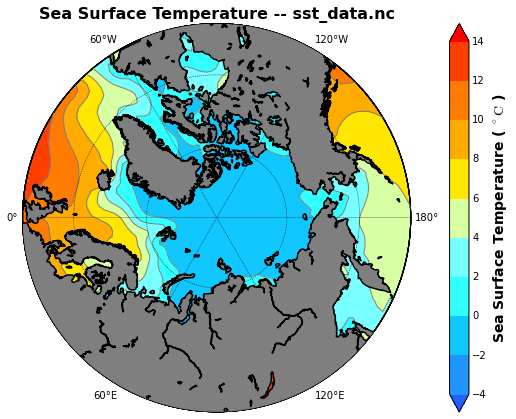

In [18]:
clev=np.arange(-4, 16, 2)
CMap=cm.GMT_no_green
var_name='Sea Surface Temperature ( $\mathrm{^\circ C}$ )'
#
fig, ax, proj = Nts.contourf_Arctic(nav_lon, nav_lat, 50, np.mean(sst, 0), clev, CMap, var_name)
#
title='Sea Surface Temperature -- sst_data.nc'
ax.set_title(title, fontsize=16, fontweight='bold')
fig.set_size_inches(8, 8)
fig.canvas.draw()

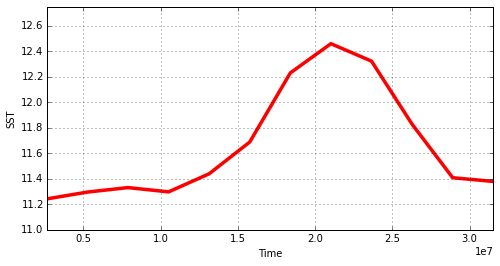

In [64]:
fig, ax = draw_temporal_variation(time_counter, np.mean(np.mean(sst, 1), 1), 'SST', 'r')
fig.set_size_inches(8, 4)
ax.autoscale(tight=True)
ax.set_ylim(11, 12.75)
fig.canvas.draw()

# Forcing: sss_data.nc

In [65]:
sss_name=glob.glob('_data/NEMO/ORCA2_INPUT/sss*.nc')
print("found file: \n{}".format(sss_name))

found file: 
['_data/NEMO/ORCA2_INPUT\\sss_data.nc']


In [66]:
sss_obj=nc.Dataset(sss_name[0])
print('Variables in {}:\n==========\n{}'.format(sss_name[0], sss_obj.variables.keys()))

Variables in _data/NEMO/ORCA2_INPUT\sss_data.nc:
[u'nav_lat', u'nav_lon', u'time_counter', u'sss']


In [67]:
nav_lon=sss_obj.variables['nav_lon'][:]
nav_lat=sss_obj.variables['nav_lat'][:]
sss=sss_obj.variables['sss'][:]
sss_obj.variables['sss'].units

u'PSU'

(array([  1.79000000e+02,   1.57100000e+03,   4.96000000e+02,
          1.38200000e+03,   3.48400000e+03,   3.24700000e+03,
          1.55910000e+04,   6.13740000e+04,   2.29275000e+05,
          8.81700000e+03]),
 array([  0.        ,   4.13971291,   8.27942581,  12.41913872,
         16.55885162,  20.69856453,  24.83827744,  28.97799034,
         33.11770325,  37.25741615,  41.39712906]),
 <a list of 10 Patch objects>)

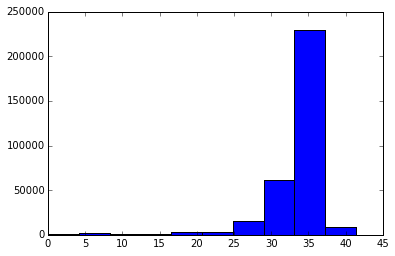

In [68]:
plt.hist(sss.flat)

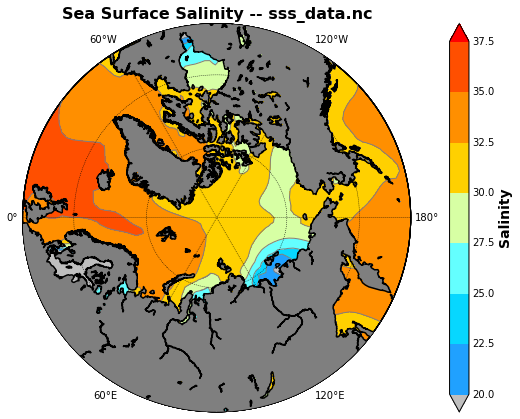

In [69]:
clev=np.arange(20, 40, 2.5)
CMap=cm.GMT_no_green
CMap.set_under([0.75, 0.75, 0.75])
var_name='Salinity'
#
fig, ax, proj = Nts.contourf_Arctic(nav_lon, nav_lat, 50, np.mean(sss, 0), clev, CMap, var_name)
#
title='Sea Surface Salinity -- sss_data.nc'
ax.set_title(title, fontsize=16, fontweight='bold')
fig.set_size_inches(8, 8)
fig.canvas.draw()

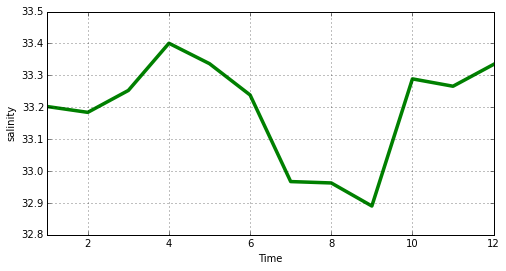

In [70]:
mon=np.arange(1, 13, 1)
fig, ax = draw_temporal_variation(mon, np.mean(np.mean(sss, 1), 1), 'salinity', 'g')
ax.set_xlim(1, 12)
fig.set_size_inches(8, 4)
fig.canvas.draw()

# Forcing: runoff_core_monthly.nc

In [71]:
runoff_name=glob.glob('_data/NEMO/ORCA2_INPUT/runoff*.nc')
print("found file: \n{}".format(runoff_name))

found file: 
['_data/NEMO/ORCA2_INPUT\\runoff_core_monthly.nc']


In [72]:
runoff_obj=nc.Dataset(runoff_name[0])
print('Variables in {}:\n==========\n{}'.format(runoff_name[0], runoff_obj.variables.keys()))

Variables in _data/NEMO/ORCA2_INPUT\runoff_core_monthly.nc:
[u'nav_lon', u'nav_lat', u'sorunoff', u'socoefr', u'socoefr0']


In [73]:
nav_lon=runoff_obj.variables['nav_lon'][:]
nav_lat=runoff_obj.variables['nav_lat'][:]
runoff=runoff_obj.variables['sorunoff'][:]
runoff_obj.variables['sorunoff'].units

u'kg/m2/s'

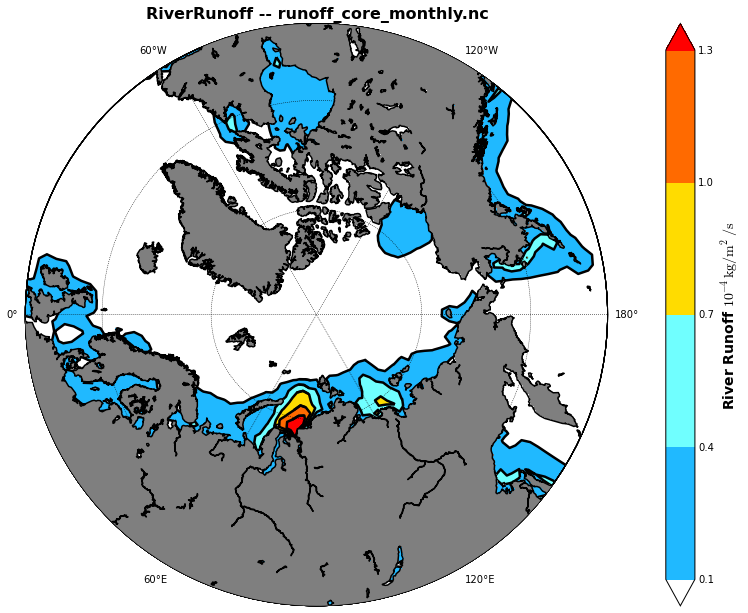

In [77]:
clev=np.arange(0.1, 1.5, 0.3)
CMap=cm.GMT_no_green
CMap.set_under('w')
var_name='River Runoff $\mathrm{10^{-4} kg/m^2/s}$'
fig, ax, proj = Nts.contourf_Arctic(nav_lon, nav_lat, 50, np.mean(runoff, 0)*1e4, clev, CMap, var_name)
#
x, y = proj(nav_lon, nav_lat)
proj.contour(x, y, np.mean(runoff, 0)*1e4, clev, colors = 'k', linewidths=2.5)
#
title='RiverRunoff -- runoff_core_monthly.nc'
ax.set_title(title, fontsize=16, fontweight='bold')
fig.set_size_inches(12, 12)
fig.canvas.draw()

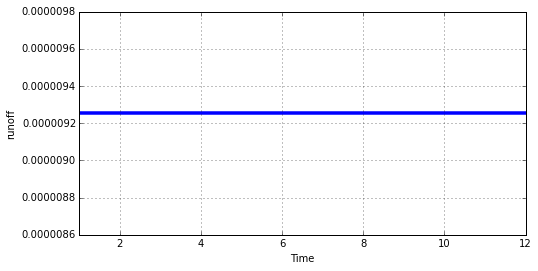

In [75]:
mon=np.arange(1, 13, 1)
fig, ax = draw_temporal_variation(mon, np.mean(np.mean(runoff, 1), 1), 'runoff', 'b')
ax.set_xlim(1, 12)
fig.set_size_inches(8, 4)
fig.canvas.draw()

In [76]:
clev[-1]

1.3000000000000003